In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
items = pd.read_csv('../data/input/items.csv')
item_categories = pd.read_csv('../data/input/item_categories.csv')
shops = pd.read_csv('../data/input/shops.csv')
sales_train = pd.read_csv('../data/input/sales_train.csv')
test = pd.read_csv('../data/input/test.csv')

In [3]:
# create column:shop_city_name
shops['shop_city_name'] = shops['shop_name'].apply(lambda x:x.split(' ')[0])
shops['shop_city_name'].value_counts()

Москва              13
РостовНаДону         3
Воронеж              3
Тюмень               3
Красноярск           2
Самара               2
СПб                  2
Н.Новгород           2
!Якутск              2
Новосибирск          2
Казань               2
Жуковский            2
Якутск               2
Уфа                  2
Курск                1
Ярославль            1
Чехов                1
Калуга               1
Интернет-магазин     1
Коломна              1
Адыгея               1
Мытищи               1
Сургут               1
Томск                1
Балашиха             1
Омск                 1
Вологда              1
Химки                1
Цифровой             1
Выездная             1
Сергиев              1
Волжский             1
Name: shop_city_name, dtype: int64

|Russian|English|
|--:|:--|
Балашиха|Balashikha|
Волжский|Volzhsky|
Вологда|Vologda|
Воронеж|Voronezh|
Выездная|Outgoing|
Жуковский|Zhukovsky|
Интернет-магазин|Online store|
Казань|Kazan|
Калуга|Kaluga|
Коломна|Kolomna|
Красноярск|Krasnoyarsk|
Курск|Kursk|
Москва|Moscow|
Мытищи|Mytishchi|
Н.Новгород|N.Novgorod|
Новосибирск|Novosibirsk|
Омск|Omsk|
РостовНаДону|Rostov-on-Don|
Самара|Samara|
Сергиев|Sergiev|
СПб|SPb|
Сургут|Surgut|
Томск|Tomsk|
Тюмень|Tyumen|
Уфа|Ufa|
Химки|Khimki|
Цифровой|Digital|
Чехов|Chekhov|
Якутск|Yakutsk|
Ярославль|Yaroslavl|

In [4]:
# proofreading shop_city_name
shops.loc[shops['shop_city_name']=='!Якутск', \
         'shop_city_name'] = 'Якутск'

In [5]:
# Add Major category to item_categories
item_categories['major_item_category'] = \
item_categories['item_category_name'].apply(lambda x:x.split(' - ')[0])

# Add sub category
item_categories['sub_item_category'] = item_categories['major_item_category']

|Russian|English|
|--:|:--|
Аксессуары|accessory|
Игры Android|android game|
Элементы питания|battery|
Чистые носители (штучные)|blank media (piece)|
Чистые носители (шпиль)|blank media(spire)|
Книги|book|
Кино|cinema|
Доставка товара|    delivery of good  |
Игры|    game  |
Игровые консоли  |  game console  |
Подарки |   gift  |
Игры MAC   | MAC game  |
Музыка|    music  |
Карты оплаты   | payment card  |
Карты оплаты (Кино, Музыка, Игры)   | payment cards (Cinema, Music, Games)  |
PC   | PC  |
Игры PC  |  PC game  |
Программы    |program  |
Служебные |   service  |
Билеты (Цифра) |   tickets(Number)  |

In [6]:
# aggregate Major category
item_categories.loc[item_categories['major_item_category'] == 'Игровые консоли',\
                   'major_item_category'] = 'Игры'
item_categories.loc[item_categories['major_item_category'] == 'Игры PC',\
                   'major_item_category'] = 'Игры'
item_categories.loc[item_categories['major_item_category'] == 'Игры MAC',\
                   'major_item_category'] = 'Игры'
item_categories.loc[item_categories['major_item_category'] == 'Игры Android',\
                   'major_item_category'] = 'Игры'
item_categories.loc[item_categories['major_item_category'] == 'Карты оплаты (Кино, Музыка, Игры)',\
                   'major_item_category'] = 'Карты оплаты'
item_categories.loc[item_categories['major_item_category'] == 'Чистые носители (шпиль)',\
                   'major_item_category'] = 'Чистые носители'
item_categories.loc[item_categories['major_item_category'] == 'Чистые носители (штучные)',\
                   'major_item_category'] = 'Чистые носители'

print(item_categories['major_item_category'].value_counts(), '\n')
print(item_categories['sub_item_category'].value_counts(),'\n')

Игры                22
Книги               13
Подарки             12
Аксессуары           7
Музыка               6
Программы            6
Кино                 5
Карты оплаты         5
Чистые носители      2
Служебные            2
Доставка товара      1
Элементы питания     1
PC                   1
Билеты (Цифра)       1
Name: major_item_category, dtype: int64 

Книги                                13
Подарки                              12
Игровые консоли                       8
Игры                                  8
Аксессуары                            7
Музыка                                6
Программы                             6
Кино                                  5
Игры PC                               4
Карты оплаты                          4
Служебные                             2
Чистые носители (шпиль)               1
Игры Android                          1
Доставка товара                       1
Элементы питания                      1
PC                                  

In [7]:
# processing outlier, negative value
sales_train = sales_train[sales_train.item_cnt_day < 100000]
sales_train = sales_train[sales_train.item_price < 1250]

median = sales_train[(sales_train.shop_id==32)&\
                     (sales_train.item_id==2973)&\
                     (sales_train.date_block_num==4)&\
                     (sales_train.item_price>0)].item_price.median()
sales_train.loc[sales_train.item_price < 0, 'item_price'] = median

In [8]:
sales_train['date'] = pd.to_datetime(sales_train['date'], format="%d.%m.%Y")
sales_train['year'] = sales_train.date.dt.year
sales_train['month'] = sales_train.date.dt.month
sales_train['day'] = sales_train.date.dt.day

In [9]:
# daily sales
sales_train['date_sales'] = sales_train['item_cnt_day'] * sales_train['item_price']

# transform monthly shop*(sales item counts)
month_shop_item_cnt = sales_train[['date_block_num', 'shop_id', 'item_id', 'item_cnt_day']].\
groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False).\
sum().rename(columns={'item_cnt_day':'month_shop_item_cnt'})

In [10]:
# monthly shop*sales
month_shop_item_sales = sales_train[['date_block_num', 'shop_id', 'item_id', 'date_sales']].\
groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False).sum().\
rename(columns={'date_sales':'month_shop_item_sales'})

# output files

In [13]:
shops.to_csv('../data/output/shops_ppd.csv', index=False)
item_categories.to_csv('../data/output/item_categories_ppd.csv', index=False)
sales_train.to_csv('../data/output/sales_train_ppd.csv', index=False)
month_shop_item_cnt.to_csv('../data/output/month_shop_item_cnt.csv', index=False)
month_shop_item_sales.to_csv('../data/output/month_shop_item_sales.csv', index=False)

# Create Monthly Data

In [11]:
train_full_comb = pd.DataFrame()# innluding test month
for i in range(35):
    mid = test[['shop_id', 'item_id']]
    mid['date_block_num'] = i
    train_full_comb = pd.concat([train_full_comb, mid], axis=0)
train_full_comb

,shop_id,item_id,date_block_num
0,5,5037,0
1,5,5320,0
2,5,5233,0
3,5,5232,0
4,5,5268,0
...,...,...,...
214195,45,18454,34
214196,45,16188,34
214197,45,15757,34
214198,45,19648,34


In [12]:
# monthly sales item number
train_test = pd.merge(
    train_full_comb,
    month_shop_item_cnt, 
    on=['date_block_num', 'shop_id', 'item_id'],
    how='left'
)

In [13]:
# monthly sales
train_test = pd.merge(
    train_test, 
    month_shop_item_sales,
    on=['date_block_num', 'shop_id', 'item_id'],
    how='left'
)

In [14]:
train_test = pd.merge(
    train_test,
    items[['item_id', 'item_category_id']],
    on='item_id',
    how='left'
)

train_test = pd.merge(
    train_test,
    item_categories[['item_category_id', 'major_item_category']],
    on='item_category_id',
    how='left'
)

train_test = pd.merge(
    train_test,
    shops[['shop_id', 'shop_city_name']],
    on='shop_id',
    how='left'
)

# Visualization Data

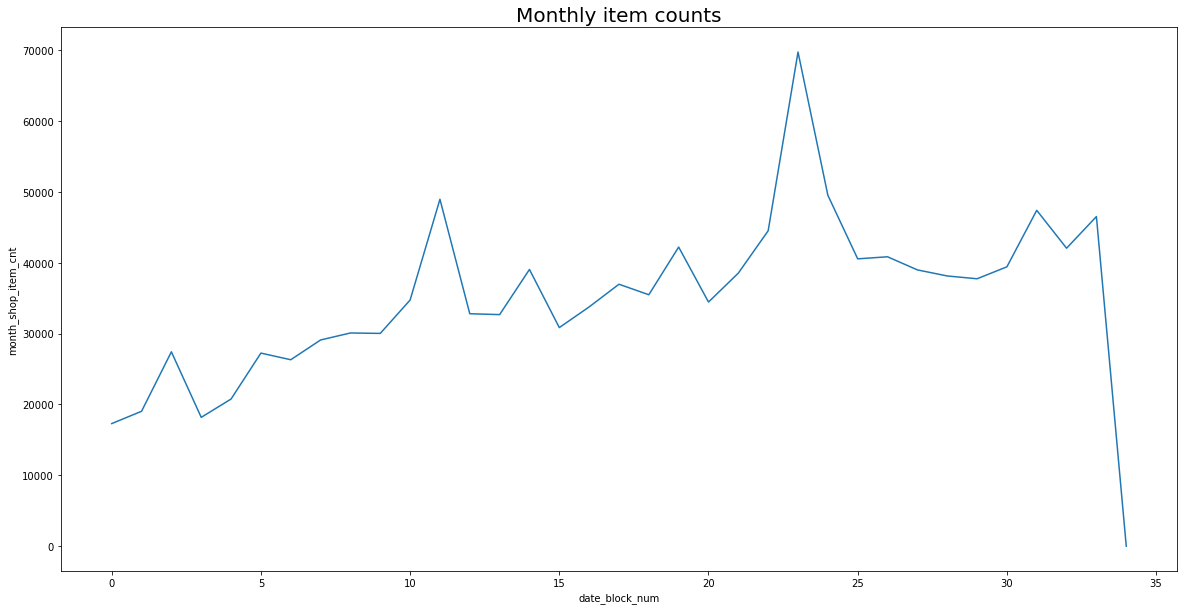

In [15]:
plt_df = train_test.groupby('date_block_num', as_index=False).sum()
plt.figure(figsize=(20, 10))
sns.lineplot(x='date_block_num', y='month_shop_item_cnt', data=plt_df)
plt.title('Monthly item counts', fontsize=20)
plt.show()

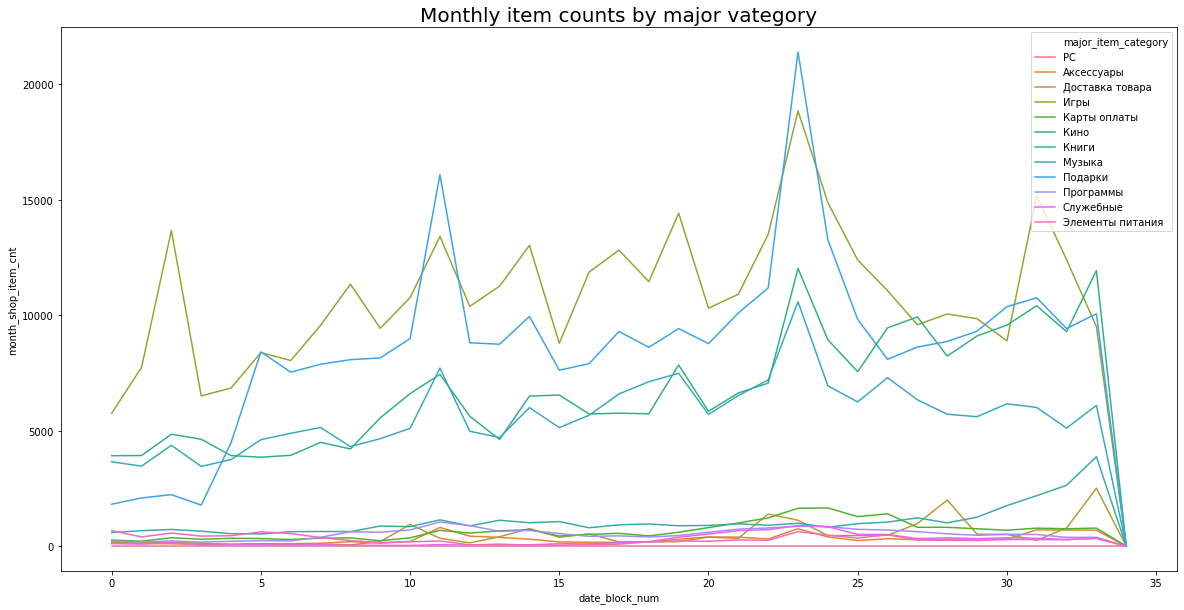

In [16]:
plt_df = train_test.groupby(['date_block_num', 'major_item_category'], as_index=False).sum()
plt.figure(figsize=(20, 10))
sns.lineplot(
    x='date_block_num',
    y='month_shop_item_cnt',
    data=plt_df, 
    hue='major_item_category'
)
plt.title('Monthly item counts by major vategory', fontsize=20)
plt.show()

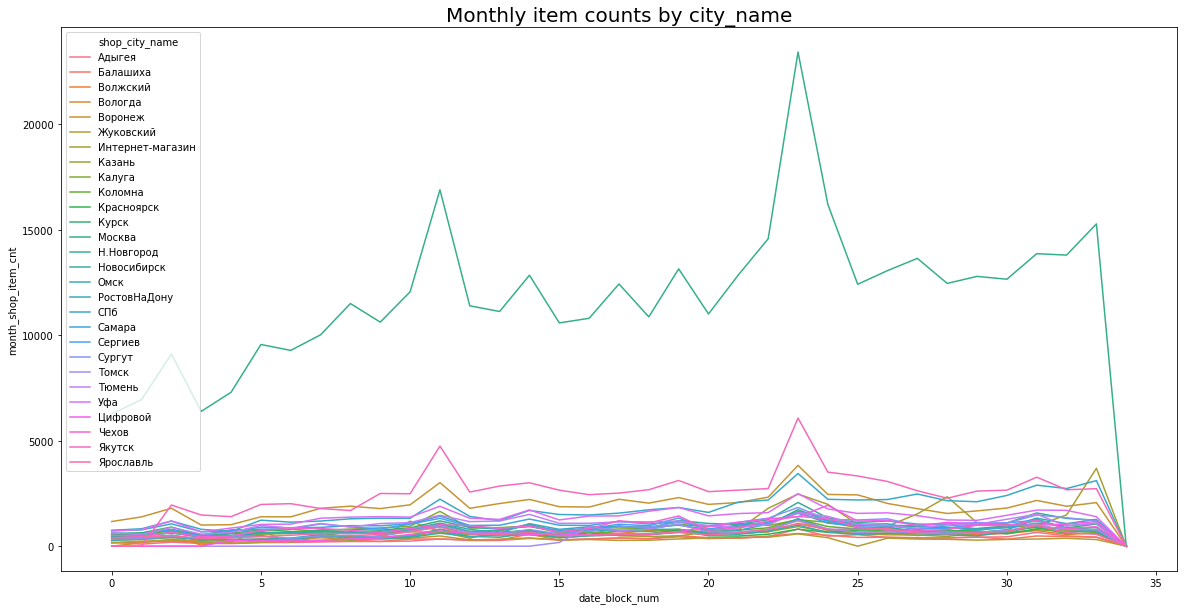

In [17]:
plt_df = train_test.groupby(['date_block_num', 'shop_city_name'], as_index=False).sum()
plt.figure(figsize=(20, 10))
sns.lineplot(
    x='date_block_num',
    y='month_shop_item_cnt',
    data=plt_df,
    hue='shop_city_name'
)
plt.title('Monthly item counts by city_name', fontsize=20)
plt.show()